In [2]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.fft import fft, ifft

N = 256

## Making the Window

In [3]:
def makeWindow(dim, theta, r):
    window = np.zeros((dim, dim, dim))
    x_cen = dim/2
    y_cen = dim/2
    z_cen = -r/np.tan(theta)
    axis = np.array([0, 0, 1])
    for i in range(dim):
        for j in range(dim):
            for k in range(1, dim):
                test = np.array([i-x_cen, j-y_cen, k-z_cen])
                cosphi = np.dot(test, axis)/np.linalg.norm(test)
                if(cosphi > abs(np.cos(theta))):
                    window[i, j, k] =  1
    return window

In [4]:
window = makeWindow(N, np.pi/8, N/8)

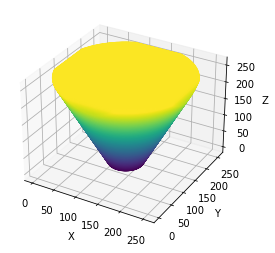

In [5]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
data = window
x, y, z = data.nonzero()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter(x, y, z, c=z, alpha=.5)

## Reading Power Spectrum Data

In [6]:
# Open data file
filepath = "test_pk.txt"
#filepath = "C:/Users/lado/Downloads/test_pk.txt.ipynb"
file = open(filepath, "r")

# Define variables
k_in, P_in = np.loadtxt(filepath, unpack=True)
L = 1000
N = 256
b = 2
f = 1

# Create full power spectrum from data
P_c = lambda x : np.interp(x, k_in, P_in)
k_freq = np.fft.fftfreq(N, L/N)
kx, ky, kz = np.meshgrid(k_freq, k_freq, k_freq)
mu = kz / np.sqrt(kx**2 + ky**2 + kz**2)
mu[np.isnan(mu)] = 0
P_Mat = np.sqrt((b + f*mu**2)**2*P_c(np.sqrt(kx**2 + ky**2 + kz**2)))*np.exp(1j*2*np.pi*np.random.random([N, N, N]))

# Applies window to position data
Pos_Mat = ifft(P_Mat)
#Pos_Mat_Wind = window*Pos_Mat
#P_in_Recon = fft(Pos_Mat_Wind) 

<ipython-input-6-60ff8ec6bef2>:17: RuntimeWarning: invalid value encountered in true_divide
  mu = kz / np.sqrt(kx**2 + ky**2 + kz**2)


In [7]:
k_bins = np.linspace(0, 0.2, 21)
dk = k_bins[2] - k_bins[1]
N_bins = np.zeros(21)
Pwin_avg = np.zeros(21)
P_avg = np.zeros(21)

for ix in range(N):
    for iy in range(N):
        for iz in range(N):
            kk = np.sqrt(kx[ix, iy, iz]**2 + ky[ix, iy, iz]**2+ kz[ix, iy, iz]**2)
            bins = int(kk/dk)
            if (bins > 20):
                continue
            N_bins[bins] += 1
            #Pwin_avg[bins] += np.abs(P_in_Recon[ix, iy, iz])
            P_avg[bins] += np.abs(P_Mat[ix, iy, iz]) 

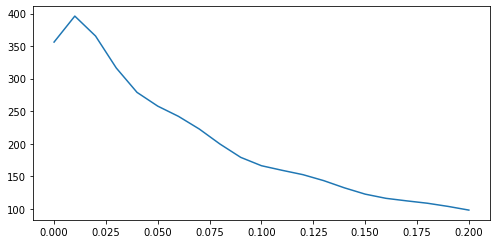

In [9]:
#plt.plot(k_bins, Pwin_avg/N_bins)
plt.plot(k_bins, P_avg/N_bins)

## Using Real Data

In [10]:
# Open data file
filepath = "C:/Users/kales/OneDrive/Desktop/Physics Research/Bispectrum Measurement/AbacusSummit_c000_LRG_z0.5.txt"
file = open(filepath, "r")

# Define variables
x_dat, y_dat, z_dat = np.loadtxt(filepath, unpack = True)


In [15]:
count_mat = np.zeros((N, N, N))
start = min(min(x_dat), min(y_dat), min(z_dat))
end = max(max(x_dat), max(y_dat), max(z_dat))
binsize = (end - start)/(N-1)

for i in range(len(x_dat)):
    x_bin = int(x_dat[i]/binsize)  
    y_bin = int(y_dat[i]/binsize) 
    z_bin = int(z_dat[i]/binsize) 
    count_mat[x_bin, y_bin, z_bin] += 1     

In [20]:
delta = (count_mat/(binsize**3) - len(x_dat)/(end-start)**3)/(len(x_dat)/(end - start)**3)
delta_win = window*delta
delta_hat = fft(delta_win)

In [26]:
bin_no = 20
k_bins = np.linspace(0, 0.2, bin_no)
dk = k_bins[2] - k_bins[1]
k_freq = np.fft.fftfreq(N)
N_bins = np.zeros(bin_no)
Pwin_avg = np.zeros(bin_no)
P_avg = np.zeros(bin_no)

for ix in range(N):
    for iy in range(N):
        for iz in range(N):
            kk = np.sqrt(k_freq[ix]**2 + k_freq[iy]**2 + k_freq[iz]**2)
            bins = int(kk/dk)
            if (bins > bin_no-1):
                continue
            N_bins[bins] += 1
            P_avg[bins] += np.abs(delta[ix, iy, iz]) 

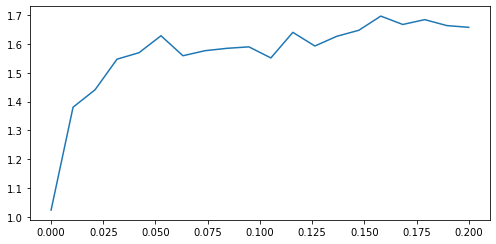

In [27]:
plt.plot(k_bins, P_avg/N_bins)